"Geo Data Science with Python" 
### Notebook Exercise 6a

---

# Python Packages: NumPy & Matplotlib

This exercise containes exercises on the Python package NumPy and Matplotlib.

If you work in teams, please indicate your colaborators below!

In [1]:
NAME = ""
COLLABORATORS = ""

---
# Part A: Data analysis with NumPy

This part of the assignment is meant to help you to understand how to use NumPy to do some basic data analysis and data manipulations using real data. In this exercise you are asked to analyze temperature data from Kumpula, Helsinki (in Southern Finland) and Rovaniemi (in northern Finland) and to explore how their summer temperatures have differed in 2017.

## Input data

We will use NOAA weather data. The data has been stored in a CSV file (comma delimited text file) which is stored in the data subdirectory: `./6153237444115dat.csv`.

You can read the full description of the data and all the attributes from this file:  `./3505doc.txt`.

The first five rows of the data look like following:

In [2]:
# USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
# 028450,99999,201705010000,174,10,14,***,***,*,*,*,2.2,**,**,**,**,67,**,**,**,8,31,31,1009.2,*****,984.1,***,***,*****,*****,*****,*****,35
# 028450,99999,201705010020,180,10,***,4,***,*,*,*,2.9,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010050,190,10,***,4,***,*,*,*,2.1,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010100,188,12,16,***,***,*,*,*,3.2,**,**,**,**,77,**,**,**,*,31,30,1009.1,*****,984.0,***,***,*****,*****,*****,*****,35

**Note**: the data includes `*`-characters that represent no-data values.

The most important columns for this exercise are:

* **USAF** = the station ID number
    * 028450 : Rovaniemi
    * 029980 : Helsinki Kumpula
* **YR--MODAHRMN** = Year-Month-Day-Hour-Minute in Greenwich Mean Time (GMT)
* **TEMP** = Temperature in Fahrenheit
* **MAX** = Maximum temperature in Fahrenheit
* **MIN** = Minimum temperature in Fahrenheit

You should read in only those columns using the `usecols()` parameter in the `genfromtxt()` function in NumPy. Please refer to the [NumPy documentation for numpy.genfromtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) to learn how to use this parameter.

---
## A.1: Basic statistics of the data 

(total of 9 points)

In this assignment part your task is to open and explore the NOAA weather data using NumPy. Please answer the given tasks and write your code into the codeblocks below.

---
### Task A.1.1

(4 points)

- **Import** the NumPy module **using the acronym `np`**
- **Read the data** using NumPy into a variable called **`data`** (1 point)
    - Note: We only want the `USAF`, `YR--MODAHRMN`, `TEMP`, `MAX`, and `MIN` columns from the data file
- **Split the data** into separate variables called `station`, `date`, `temp`, `temp_max`, and `temp_min`

In [3]:
""" Add your code to import numpy and read the data"""

import numpy as np 

path = './6153237444115dat.csv'

# selecting the required rows with usecols
data = np.genfromtxt(path, skip_header=1, delimiter=',', usecols=(0,2,21,26,27))

# assigning columns to the relevant variables
station = data [:, 0]
date = data[:,1]
temp = data[:, 2]
temp_max = data[:, 3]
temp_min = data[:, 4]


In [4]:
# Test your code

print(station)
print(date)
print(temp)
print(temp_max)
print(temp_min)


[28450. 28450. 28450. ... 29980. 29980. 29980.]
[2.01705010e+11 2.01705010e+11 2.01705010e+11 ... 2.01708312e+11
 2.01708312e+11 2.01708312e+11]
[31. 30. 30. ... 64. 64. 64.]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]


---
### Task A.1.2

(2 points)

Next, in the codeblock below, request appropriate numpy attributes that provide answers to these following questions:

- What are the dimensions of the data? 
- What is the datatype of the data?


In [5]:
""" Add your code to answer the questions"""

# Print the dimensions of the data:
size_data = data.shape
size_station =  station.shape
size_temp =  temp.shape
size_tempMax =  temp_max.shape
size_tempMin =  temp_min.shape


# Print the datatype of the data:
type_data = date.dtype
type_station =  station.dtype
type_temp =  temp.dtype
type_tempMax =  temp_max.dtype
type_tempMin =  temp_min.dtype



In [6]:
""" Add your code to print the answers to the questions"""

print ('The data used for this exercise come from an array of dimension {}. \n' 
       'All arrays split from the "data" array are vectors with dimensions of {}. \n'
       'All data are {} values.'.format(size_data, size_station, type_data))

The data used for this exercise come from an array of dimension (11694, 5). 
All arrays split from the "data" array are vectors with dimensions of (11694,). 
All data are float64 values.


---
### Task A.1.3

(3 points)

Now, let's explore basic statistics in the data, with the functions `np.nanmean()`, `np.nanstd()` and `np.unique()`.
The first two functions calculate mean and standard deviation of a numpy array, ignoring all NaN values.

- What is the mean Fahrenheit temperature in the data (the `temp` variable)? Assign this number to the variable `temp_mean`.
- What is the standard deviation of the maximum temperature (the `temp_max` variable)? Assign this number to the variable `temp_max_std`.
- How many unique stations exists in the data (the `station` variable)? Use the numpy method `unique()` and assign this number to the variable `station_count`.


In [7]:
""" Add your code to answer the questions"""

# Calculate mean temperature
temp_mean = np.nanmean(temp)

# Calculate standard deviaton of the maximum temperature:
temp_max_std = np.nanstd(temp_max)

# Calculate number of unique stations:
station_count = len(np.unique(station))

In [8]:
""" Add your code to print the answers to the questions"""

print(' The mean temperature in Fahrenheit is {:.0f} degrees, and the standard deviation for the maximum temperatures is {:.0f} degrees.\n' \
      'These values are obtained from {} different stations.'.format (temp_mean, temp_max_std, station_count))

 The mean temperature in Fahrenheit is 52 degrees, and the standard deviation for the maximum temperatures is 10 degrees.
These values are obtained from 2 different stations.


---
# A.2: Data manipulation 

(8 points)

We will keep working with data from the file '6153237444115dat.csv', which should be saved in the variable `data`, as well as in the individual column variables `station`, `date`, `temp`, `temp_max`, and `temp_min`. Work on the following tasks for data manipulation.

---
### Task A.2.1: Remove no data values

(3 points)

In the previous part, you had to use functions ignoring NaN values in the dataset. Now, we want to completely remove those datasets with nan-values. **Make sure that you comment your code (add inline comments explaining what your code does).**

In the codeblock below:

 - Create a new mask variable `tempmask` that is `True` for all finite temperature values, and `False` for `nan` values in the `temp` variable
 - Filter (remove) all rows from the column variables (`station`, `date`, `temp`, `temp_max`, and `temp_min`) using the `tempmask` array and save the new columns in the variables (`station_noNan`, `date_noNan`, `temp_noNan`, `temp_max_noNan`, and `temp_min_noNan`)
 

In [9]:
""" Add your code to create the mask and assign variables"""

#  mask that filters out nan values
tempmask = np.isfinite(temp)

# applying the mask to all columns 
station_noNan = station [tempmask]

date_noNan = date[tempmask]

temp_noNan = temp[tempmask]

temp_max_noNan = temp_max[tempmask]

temp_min_noNan = temp_min[tempmask]

In [10]:
# Check your results (for example using the len() function)
print(len(data))
print(len(temp_noNan))
print(len(station_noNan))


11694
11691
11691


---
### Task A.2.2: Divide the data into two separate datasets

(4 points)

In this problem you should divide the data into separate subsets for different stations.

- Select all rows from the data arrays containin no nan-values into variable called `kumpula` where the `station` value is `29980` using an array mask called `kmask`
- Select all rows from the data arrays containin no nan-values into variable called `rovaniemi` where the `station` value is `28450` using an array mask called `rmask`
  
Please use the given variable names and write your answer into the code cell below.

Hint: the functions `vstack()` and `transpose()` might be useful for this task.

Note: Don't be surprised, if there are still nan-values in the dataset. Keep in mind, that you have (and should have) excluded only nan-values in the temperature column of the dataset.

In [11]:
""" Add your code to split the dataset"""
# mask that uses the code to find kumpula station 
kmask = station_noNan == 29980
# mask that uses the code to find rovaniemi station 
rmask = station_noNan == 28450

# columns of data for only kumpula station 
kumpula = np.vstack((station_noNan[kmask], date_noNan[kmask], temp_noNan[kmask], temp_max_noNan[kmask], temp_min_noNan[kmask]))
kumpula = np.transpose (kumpula)

# columns of data for only rovaniemi station 
rovaniemi = np.vstack((station_noNan[rmask], date_noNan[rmask], temp_noNan[rmask], temp_max_noNan[rmask], temp_min_noNan[rmask]))
rovaniemi = np.transpose (rovaniemi)

In [12]:
# Check the data (you don't need to modify this cell)
print("Kumpula: \n", kumpula[:5,:], "\n")
print("Rovaniemi: \n", rovaniemi[:5,:], "\n")


Kumpula: 
 [[2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.9000000e+01           nan           nan]] 

Rovaniemi: 
 [[2.8450000e+04 2.0170501e+11 3.1000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.1000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]] 



---
## Task A.2.3: Save the data into a csv-file

(1 point)

Now save the data for each station into a csv-file, using the savetext() function in the code cell below. 


In [13]:
""" Add your code to save the dataset"""

# saving results to 2 separate files
np.savetxt('kumpula_temps.csv', kumpula, delimiter = ',')
np.savetxt('rovaniemi_temps.csv', rovaniemi, delimiter = ',')

---
# A.3: Data analysis 

(9 points)

In this problem the aim is to understand the differences between temperatures in Helsinki Kumpula and Rovaniemi. The data are now stored in your variables `kumpula` and `rovaniemi`. Remember to comment your code.

---
### Task A.3.1

(1 point)

What was the median temperature during the observed period in:
  - Helsinki Kumpula? (store the answer in a variable `kumpula_median`
  - Rovaniemi? (store the answer in a variable `rovaniemi_median`

In [14]:
""" Add your code"""

# calculating median temp 
kumpula_temp = kumpula [:,2]
kumpula_median = np.median(kumpula_temp)

# calculating median temp 
rovaniemi_temp = rovaniemi [:,2]
rovaniemi_median = np.median(rovaniemi_temp)

In [15]:
#Print the answer:
print("Kumpula median: ", kumpula_median)
print("Rovaniemi median: ", rovaniemi_median)


Kumpula median:  58.0
Rovaniemi median:  52.0


---
### Task A.3.2

(4 points)

The median temperatures above consider data from quite a long period of time (May-Aug), hence the differences might not be so clear.
**Let's now find out what the mean temperatures in May and June in Kumpula and Rovaniemi were:**

- Select from `rovaniemi` and `kumpula` arrays the rows where values of the `date` column are from May 2017
and assign them into mask variables `rovaniemi_may` and `kumpula_may`
- Repeat the procedure for the month of June and assign those values into mask variables `rovaniemi_june` and `kumpula_june`


In [16]:
""" Enter code to make subset of the Kumpula and  
    Rovaniemi data for the 5th and 6th months"""

# creating may and jun mask for kumpula
kumpula_date = kumpula[:,1]
k_mayMask = (kumpula_date >= 201705010000) & (kumpula_date < 201706010000)
k_juneMask = (kumpula_date >= 201706010000) & (kumpula_date < 201707010000)

# creating may and june mask for rovaniemi
rovaniemi_date = rovaniemi[:,1]
r_mayMask = (rovaniemi_date >= 201705010000) & (rovaniemi_date < 201706010000)
r_juneMask = (rovaniemi_date >= 201706010000) & (rovaniemi_date < 201707010000)

# subset of array for may and june months
kumpula_may = kumpula [k_mayMask]
rovaniemi_may = rovaniemi [r_mayMask]

# subset of array for may and june months

kumpula_june = kumpula [k_juneMask]
rovaniemi_june = rovaniemi [r_juneMask]


---
### Task A.3.3

(2 point)

Print the mean, min and max temperatures for both locations in May and June using the new masks (`rovaniemi_may`,`kumpula_may`,`rovaniemi_june` and `kumpula_june`).

In [17]:
""" Add your code"""

print('For Kumpula in May, the mean, min and max temperatures are {:.0f}, {:.0f} and {:.0f} ℉, respectively. \nIn June, they all increase to {:.0f}, {:.0f} and {:.0f} ℉, respectively.'\
     .format(np.mean(kumpula_may[:,2]), np.min(kumpula_may[:,2]), np.max(kumpula_may[:,2]),np.mean(kumpula_june[:,2]), np.min(kumpula_june[:,2]), np.max(kumpula_june[:,2])))

print('\nFor Rovaniemi in May, the mean, min and max temperatures are {:.0f}, {:.0f} and {:.0f} ℉, respectively. \nIn June, they also increase to {:.0f}, {:.0f} and {:.0f} ℉, respectively.'\
     .format(np.mean(rovaniemi_may[:,2]), np.min(rovaniemi_may[:,2]), np.max(rovaniemi_may[:,2]),np.mean(rovaniemi_june[:,2]), np.min(rovaniemi_june[:,2]), np.max(rovaniemi_june[:,2])))

For Kumpula in May, the mean, min and max temperatures are 50, 28 and 73 ℉, respectively. 
In June, they all increase to 57, 37 and 75 ℉, respectively.

For Rovaniemi in May, the mean, min and max temperatures are 37, 19 and 59 ℉, respectively. 
In June, they also increase to 52, 30 and 74 ℉, respectively.


---
### Task A.3.4

(2 points) 

Let's briefly interpret the results of this data analysis. Justify your answers to the following questions based on the data analysis results from this exercise (edit the markdown cell below to add your answers):

1. Does there seem to be a large difference in temperatures between the months?
2. Is Rovaniemi a much colder place than Kumpula?

Ans 1:
` There is a reltive large difference in monthly temperatures for Rovaniemi. Although Kumpula also records an increase, the difference is not as much. `



Ans 2:
`Rovaniemi has a lower mean, min and max in both May and June, so it must be colder than Kumpula.`

---
# Part B: Plot your data

(total of 13 points)

## B.1: Compare time series from two locations.

(7 points) 

In the previous part of this assignment (A.3) you have extracted the hourly temperature measurements during the month of May, 2017 for the two locations *Kumpula* and *Rovaniemi*. These are still available in the numpy arrays `kumpula` and `rovaniemi`. Now you should plot the data, to compare them visually. You can also check if the plots supports your conclusion you made in task A.3.4. Make sure to comment your code as much as necessary.

Plot format & grading criteria:

1. The lines should be dashed with circles for the data points
2. The graph for *Kumpula* should be red, the graph for *Rovaniemi* should be blue
3. You should also include a title `"Kumpula & Rovaniemi Temperatures in May 2017"` 
4. X-label should be `"Time"`
5. Y-label should be `"Temperature [°F]"`
6. Mark the highest peak in one time series by adding text to the graph: `'High temperature in May 2017 (location)'`
7. save your figure in a .png image file.

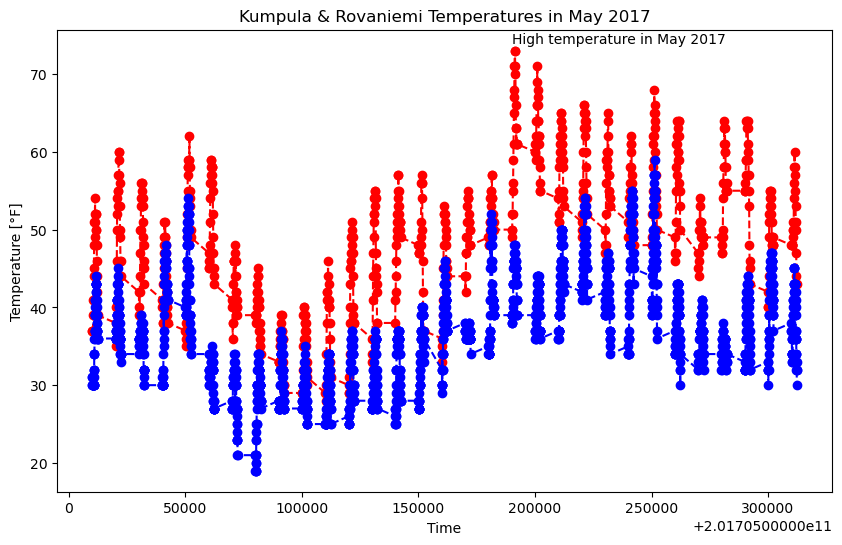

In [18]:
""" Add your code to plot the data"""

import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [10, 6]

# plotting results
plt.plot(kumpula_may[:,1], kumpula_may[:,2], 'ro--')
plt.plot(rovaniemi_may[:,1], rovaniemi_may[:,2], 'bo--')
plt.title('Kumpula & Rovaniemi Temperatures in May 2017')
plt.xlabel('Time')
plt.ylabel('Temperature [°F]')
plt.text(201705190000, 74.0, 'High temperature in May 2017')
plt.savefig('temp-plot.png')
plt.show()

---
### B2: Plot with date labels

(6 points)

Add the following two items to your plot from the previous task:

* Add date labels to the x axis in datetime format `'%Y%m%d%H%M'`. <br> Hint: use the `plt.subplots()` function this time, but do not create rows or colums.
* Add a legend for the two colored graphs to the plot. You will have to self-study the solution for this!
* Add a grid to the background.


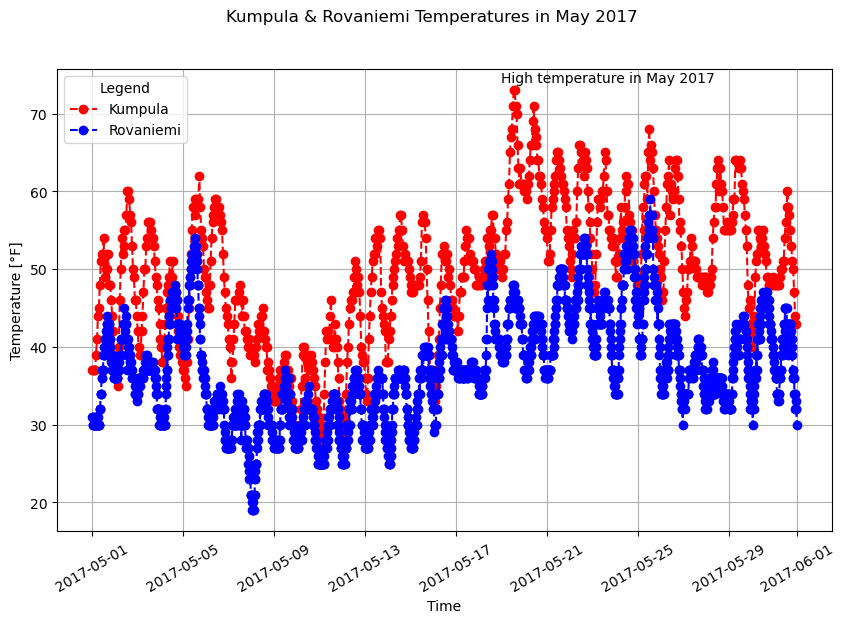

In [19]:
""" Add your code to plot the data"""

from datetime import datetime 

# converting to string 
rovaniemiDates_str = rovaniemi_may[:,1].astype(str)

# converting numbers to datetime format 
rDates = [datetime.strptime(i, '%Y%m%d%H%M.%f') for i in rovaniemiDates_str]
rDates = np.array(rDates)

# converting to string 
kumpulaDates_str = kumpula_may[:,1].astype(str)

# converting numbers to datetime format 
kDates = [datetime.strptime(i, '%Y%m%d%H%M.%f') for i in kumpulaDates_str]
kDates = np.array(kDates)





# Create the figure and subplot
fig, ax = plt.subplots(1, figsize=(10,6))

# Plot data
ax.plot(kDates, kumpula_may[:,2],   c='red', marker = 'o', linestyle = '--', label = 'Kumpula')
ax.plot(rDates, rovaniemi_may[:,2],   c='blue', marker = 'o', linestyle = '--', label = 'Rovaniemi')


# Turn plot grid
ax.grid()

# Figure title
fig.suptitle('Kumpula & Rovaniemi Temperatures in May 2017')

# Axis labels
ax.set_ylabel('Temperature [°F]')
ax.set_xlabel('Time')

# label rotation
ax.tick_params('x', labelrotation = 30)

# add text
plt.text(datetime(2017, 5, 19), 74.0, 'High temperature in May 2017')


# Add a legend, and position it on the upper left 
#hint from   https://riptutorial.com/matplotlib/example/11258/multiple-lines-curves-in-the-same-plot
plt.legend(loc='upper left', title = 'Legend', frameon = True)  

plt.show()

---
If you are satisfied with your assignments, save it and make a backup. Then submit it to your homework repository.

In [ ]:
%%bash 
git pull
